In [1]:
import os
from IPython.display import display
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

os.makedirs('img', exist_ok=True)
os.makedirs('results', exist_ok=True)
#特征文件
featurePath=r"F:\function\note1—影像组学\二分类指定数据集\DL_radmico_imagenet.csv"
# 对应的标签文件
group_info = 'group'
labelf = r"F:\function\note1—影像组学\二分类指定数据集\label_class1.csv"
# 读取标签数据列名
labels = ['label']
#读取特征文件
if os.path.exists(featurePath):
    rad_data = pd.read_csv(featurePath, header=0)
    rad_data.columns = [c.replace('-', '_') for c in rad_data.columns]
rad_data.head()

,ID,exponential_firstorder_10Percentile,exponential_firstorder_90Percentile,exponential_firstorder_Energy,exponential_firstorder_Entropy,exponential_firstorder_InterquartileRange,exponential_firstorder_Kurtosis,exponential_firstorder_Maximum,exponential_firstorder_Mean,exponential_firstorder_MeanAbsoluteDeviation,...,DL_feature_imagenet_2038,DL_feature_imagenet_2039,DL_feature_imagenet_2040,DL_feature_imagenet_2041,DL_feature_imagenet_2042,DL_feature_imagenet_2043,DL_feature_imagenet_2044,DL_feature_imagenet_2045,DL_feature_imagenet_2046,DL_feature_imagenet_2047
0,1.nii.gz,2.364951,50.143583,108921131.0,3.146191,17.389502,19.390018,256.853494,22.677123,21.373053,...,3.401670,0.000000,9.273416,13.875411,0,0,0,6.170301,0,0.959738
1,2.nii.gz,1.430661,37.004438,124973091.1,2.563674,10.490297,34.766460,266.900003,15.753674,16.918392,...,3.523779,0.000000,8.496507,13.211157,0,0,0,6.163851,0,1.243671
2,3.nii.gz,3.399899,114.392688,100150240.4,3.624026,21.440884,9.334890,293.402242,36.288848,36.697213,...,3.626305,0.000000,9.130648,14.633632,0,0,0,5.790430,0,1.386479
3,4.nii.gz,5.498816,35.467225,123549620.3,2.935309,13.623517,56.620631,233.907385,18.657237,11.732375,...,3.666407,0.000000,8.385847,12.341224,0,0,0,5.848679,0,0.675074
4,5.nii.gz,0.039646,10.279716,152184668.6,1.051274,2.974540,10.559648,37.334226,3.890181,4.397176,...,3.201568,0.048014,8.842095,13.171087,0,0,0,6.455277,0,1.216285


# 特征统计

,0,count
2,firstorder,252
1,glcm,308
5,gldm,196
3,glrlm,224
4,glszm,224
0,imagenet,2048
6,ngtdm,70
7,shape,14


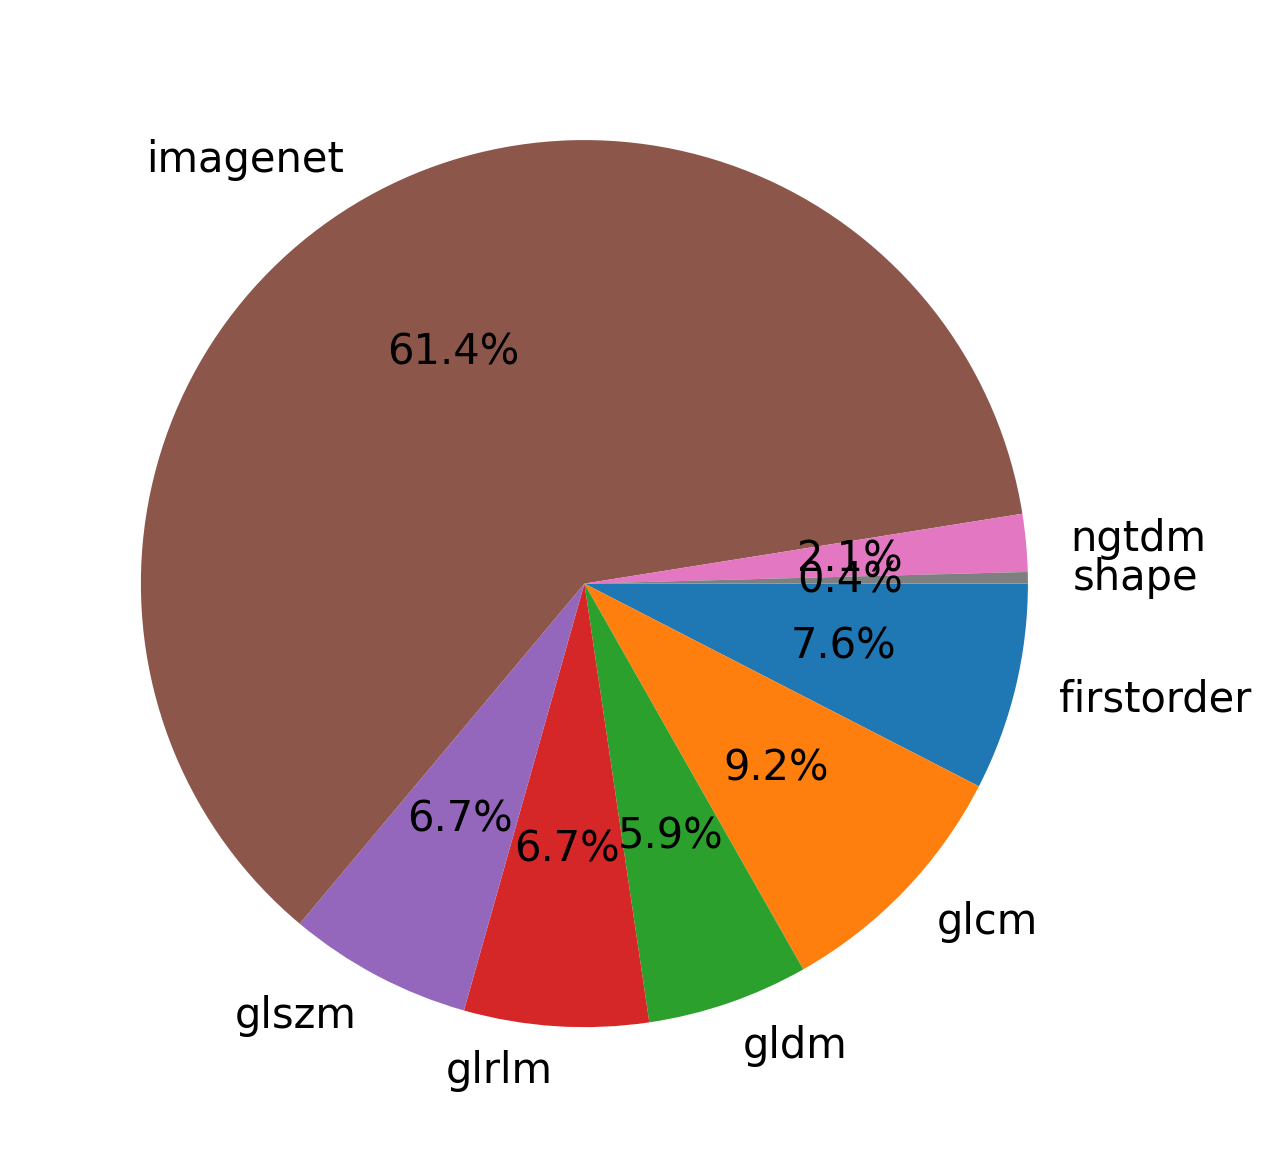

In [2]:
import matplotlib.pyplot as plt
sorted_counts = pd.DataFrame([c.split('_')[-2] for c in rad_data.columns if c !='ID']).value_counts()
sorted_counts = pd.DataFrame(sorted_counts, columns=['count']).reset_index()
sorted_counts = sorted_counts.sort_values(0)
display(sorted_counts)
plt.pie(sorted_counts['count'], labels=[i for i in sorted_counts[0]], startangle=0,
        counterclock = False, autopct = '%.1f%%')
plt.savefig(f'img/Rad_feature_ratio.svg', bbox_inches = 'tight')

# 标注数据

In [3]:
label_data = pd.read_csv(labelf)
label_data['ID'] = label_data['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
label_data = label_data[['ID', 'group'] + labels]
label_data.head()

,ID,group,label
0,1.nii.gz,train,1
1,2.nii.gz,train,0
2,3.nii.gz,train,0
3,4.nii.gz,train,1
4,5.nii.gz,train,1


# 特征拼接

In [4]:
combined_data = pd.merge(rad_data, label_data, on=['ID'], how='inner')
ids = combined_data['ID']
combined_data = combined_data.drop(['ID'], axis=1)
print(combined_data[labels].value_counts())
combined_data

label
1        705
0        371
dtype: int64


,exponential_firstorder_10Percentile,exponential_firstorder_90Percentile,exponential_firstorder_Energy,exponential_firstorder_Entropy,exponential_firstorder_InterquartileRange,exponential_firstorder_Kurtosis,exponential_firstorder_Maximum,exponential_firstorder_Mean,exponential_firstorder_MeanAbsoluteDeviation,exponential_firstorder_Median,...,DL_feature_imagenet_2040,DL_feature_imagenet_2041,DL_feature_imagenet_2042,DL_feature_imagenet_2043,DL_feature_imagenet_2044,DL_feature_imagenet_2045,DL_feature_imagenet_2046,DL_feature_imagenet_2047,group,label
0,2.364951,50.143583,1.089211e+08,3.146191,17.389502,19.390018,256.853494,22.677123,21.373053,10.404977,...,9.273416,13.875411,0,0,0,6.170301,0,0.959738,train,1
1,1.430661,37.004438,1.249731e+08,2.563674,10.490297,34.766460,266.900003,15.753674,16.918392,5.213573,...,8.496507,13.211157,0,0,0,6.163851,0,1.243671,train,0
2,3.399899,114.392688,1.001502e+08,3.624026,21.440884,9.334890,293.402242,36.288848,36.697213,14.770169,...,9.130648,14.633632,0,0,0,5.790430,0,1.386479,train,0
3,5.498816,35.467225,1.235496e+08,2.935309,13.623517,56.620631,233.907385,18.657237,11.732375,12.939656,...,8.385847,12.341224,0,0,0,5.848679,0,0.675074,train,1
4,0.039646,10.279716,1.521847e+08,1.051274,2.974540,10.559648,37.334226,3.890181,4.397176,1.274390,...,8.842095,13.171087,0,0,0,6.455277,0,1.216285,train,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.651467,25.636371,7.443372e+07,1.949113,7.550399,14.654515,97.914118,9.640757,10.075964,3.355116,...,186.498780,251.601520,0,0,0,163.957210,0,123.246730,test,1
1072,84.046060,312.656116,1.405528e+08,5.390501,133.182739,28.840267,1307.040979,200.152655,92.472357,162.568904,...,283.049650,364.751830,0,0,0,282.077800,0,180.473270,test,1
1073,14.986032,117.151500,1.151618e+08,4.549049,59.132233,6.121274,255.766689,61.419025,36.715169,46.022721,...,190.796830,251.756130,0,0,0,213.847150,0,111.715836,test,1
1074,1.848528,120.574252,1.566756e+08,4.474438,55.581217,5.915249,252.442374,49.282009,36.389554,38.591718,...,178.522130,275.360440,0,0,0,289.559000,0,136.520110,test,1


# 获取数据统计信息

In [5]:
combined_data.describe()

,exponential_firstorder_10Percentile,exponential_firstorder_90Percentile,exponential_firstorder_Energy,exponential_firstorder_Entropy,exponential_firstorder_InterquartileRange,exponential_firstorder_Kurtosis,exponential_firstorder_Maximum,exponential_firstorder_Mean,exponential_firstorder_MeanAbsoluteDeviation,exponential_firstorder_Median,...,DL_feature_imagenet_2039,DL_feature_imagenet_2040,DL_feature_imagenet_2041,DL_feature_imagenet_2042,DL_feature_imagenet_2043,DL_feature_imagenet_2044,DL_feature_imagenet_2045,DL_feature_imagenet_2046,DL_feature_imagenet_2047,label
count,1076.000000,1076.000000,1.076000e+03,1.076000e+03,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,...,1076.000000,1076.000000,1076.000000,1076.0,1076.0,1076.0,1076.000000,1076.0,1076.000000,1076.000000
mean,21.351654,139.052662,1.872179e+08,3.584598e+00,52.738312,22.140074,507.497115,71.718757,45.528389,50.522801,...,0.678728,92.692441,124.647605,0.0,0.0,0.0,99.815923,0.0,52.777596,0.655204
std,48.298285,165.290722,6.534708e+08,1.525830e+00,66.689246,23.951736,472.352154,92.923269,46.025930,83.161172,...,1.026982,119.756993,157.531829,0.0,0.0,0.0,133.972801,0.0,70.109321,0.475523
min,0.000685,0.038321,2.217916e+07,-3.200000e-16,0.018542,1.850111,0.108848,0.020855,0.014625,0.003612,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,1.838227,32.066865,9.627764e+07,2.633057e+00,11.454809,7.739062,143.149027,16.714667,12.968080,8.048081,...,0.000000,9.264106,13.817673,0.0,0.0,0.0,6.804544,0.0,1.225762,0.000000
50%,6.733620,85.001759,1.191088e+08,3.816469e+00,31.550627,14.193810,362.984541,42.385262,33.058512,22.186071,...,0.069390,18.076586,27.307722,0.0,0.0,0.0,17.969578,0.0,4.783817,1.000000
75%,19.144231,181.373042,1.470113e+08,4.799876e+00,71.351262,26.744714,731.760838,87.440069,64.353721,55.052629,...,1.309372,181.389395,240.543593,0.0,0.0,0.0,188.431173,0.0,114.283258,1.000000
max,577.876536,1519.630653,8.682320e+09,6.326989e+00,570.624488,320.711305,2604.823337,864.973037,472.835778,812.656664,...,4.533281,538.288000,729.195800,0.0,0.0,0.0,635.107100,0.0,241.373200,1.000000


# z值标准化

In [6]:
from pixelmed_calc.custom.components.comp1 import normalize_df
data = normalize_df(combined_data, not_norm=labels, group=group_info)
data = data.dropna(axis=1)
data.describe()

一台pixelmedAI只能绑定一台机器使用，请复制机器码： 317C3355D46932B3AB9BC8C653626306 联系影像诊断小札记获取注册码


KeyboardInterrupt: Interrupted by user

# 统计检验，不是标配

In [ ]:
import seaborn as sns
from pixelmed_calc.custom.components.stats import clinic_stats

stats = clinic_stats(data[data['group'] == 'train'], stats_columns=list(data.columns[0:-2]), label_column=labels[0],
                     continuous_columns=list(data.columns[0:-2]))
stats

In [ ]:
import matplotlib.pyplot as plt

def map2float(x):
    try:
        return float(str(x)[1:])
    except:
        return 1

stats[['pvalue']] = stats[['pvalue']].applymap(map2float)
stats[['group']] = stats[['feature_name']].applymap(lambda x: x.split('_')[-2])
stats = stats[['feature_name', 'pvalue', 'group']]
g = sns.catplot(x="group", y="pvalue", data=stats, kind="violin")
g.fig.set_size_inches(15,10)
sns.stripplot(x="group", y="pvalue", data=stats, ax=g.ax, color='black')
plt.savefig(f'img/Rad_feature_stats.svg', bbox_inches = 'tight')

# 通过p值筛选特征

In [ ]:
pvalue = 0.05
sel_feature = list(stats[stats['pvalue'] < pvalue]['feature_name']) + labels + [group_info]
data = data[sel_feature]
data

# 通过相关系数筛选特征

In [ ]:
pearson_corr = data[data['group'] == 'train'][[c for c in data.columns if c not in labels]].corr('pearson')
# kendall_corr = data[[c for c in data.columns if c not in labels]].corr('kendall')
# spearman_corr = data[[c for c in data.columns if c not in labels]].corr('spearman')

In [ ]:
from pixelmed_calc.custom.components.comp1 import select_feature
sel_feature = select_feature(pearson_corr, threshold=0.9, topn=10, verbose=False)
sel_feature = sel_feature + labels + [group_info]
sel_feature

In [ ]:
#过滤特征
sel_data = data[sel_feature]
sel_data

# 构建数据集

In [ ]:

n_classes = 2
train_data = sel_data[(sel_data[group_info] == 'train')]
train_ids = ids[train_data.index]
train_data = train_data.reset_index()
train_data = train_data.drop('index', axis=1)
y_data = train_data[labels]
X_data = train_data.drop(labels + [group_info], axis=1)

test_data = sel_data[sel_data[group_info] == 'test']
test_ids = ids[test_data.index]
test_data = test_data.reset_index()
test_data = test_data.drop('index', axis=1)
y_test_data = test_data[labels]
X_test_data = test_data.drop(labels + [group_info], axis=1)


val_data = sel_data[sel_data[group_info] == 'val']
val_ids = ids[val_data.index]
val_data = val_data.reset_index()
val_data = val_data.drop('index', axis=1)
y_val_data = val_data[labels]
X_val_data = val_data.drop(labels + [group_info], axis=1)

val1_data = sel_data[sel_data[group_info] == 'val1']
val1_ids = ids[val1_data.index]
val1_data = val1_data.reset_index()
val1_data = val1_data.drop('index', axis=1)
y_val1_data = val1_data[labels]
X_val1_data = val1_data.drop(labels + [group_info], axis=1)

y_all_data = sel_data[labels]
X_all_data = sel_data.drop(labels + [group_info], axis=1)

column_names = X_data.columns
print(f"训练集样本数：{X_data.shape}, 测试集样本数：{X_test_data.shape}，验证集样本数：{X_val_data.shape},验证集1样本数：{X_val1_data.shape}")

# lasso 回归

In [ ]:
import numpy as np
import pixelmed_calc.custom.components as okcomp

alpha = okcomp.comp1.lasso_cv_coefs(X_data, y_data, column_names=None)
plt.savefig(f'img/Rad_feature_lasso.svg', bbox_inches = 'tight')


In [ ]:
#模型效能
okcomp.comp1.lasso_cv_efficiency(X_data, y_data, points=50)
plt.savefig(f'img/Rad_feature_mse.svg', bbox_inches = 'tight')

In [ ]:
from sklearn import linear_model

models = []
for label in labels:
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X_data, y_data[label])
    models.append(clf)

### 特征筛选

筛选出其中coef > 0的特征。并且打印出相应的公式。

In [ ]:
COEF_THRESHOLD = 1e-6 # 筛选的特征阈值
scores = []
selected_features = []
for label, model in zip(labels, models):
    feat_coef = [(feat_name, coef) for feat_name, coef in zip(column_names, model.coef_)
                 if COEF_THRESHOLD is None or abs(coef) > COEF_THRESHOLD]
    selected_features.append([feat for feat, _ in feat_coef])
    formula = ' '.join([f"{coef:+.6f} * {feat_name}" for feat_name, coef in feat_coef])
    score = f"{label} = {model.intercept_} {'+' if formula[0] != '-' else ''} {formula}"
    scores.append(score)

print(scores[0])

In [ ]:
#特征权重
feat_coef = sorted(feat_coef, key=lambda x: x[1])
feat_coef_df = pd.DataFrame(feat_coef, columns=['feature_name', 'Coefficients'])
feat_coef_df.plot(x='feature_name', y='Coefficients', kind='barh')

plt.savefig(f'img/Rad_feature_weights.svg', bbox_inches = 'tight')

In [ ]:
#进一步筛选特征
X_data = X_data[selected_features[0]]
X_test_data = X_test_data[selected_features[0]]
X_val_data=X_val_data[selected_features[0]]
X_val1_data=X_val1_data[selected_features[0]]

#X_data.columns
print(X_test_data.shape)


# 模型筛选

In [ ]:
model_names = ['SVM', 'KNN', 'RandomForest', 'ExtraTrees', 'XGBoost', 'LightGBM', 'MLP', 'LR']
models = okcomp.comp1.create_clf_model(model_names)
model_names = list(models.keys())

## 交叉验证挑数据

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

# 随机使用n_trails次数据划分，找到最好的一次划分方法，并且保存在results中。
results = okcomp.comp1.get_bst_split(X_data, y_data, models, test_size=0.2, metric_fn=roc_auc_score, n_trails=5, cv=True, random_state=0)
_, (X_train_sel, X_test_sel, y_train_sel, y_test_sel) = results['results'][results['max_idx']]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = X_data, X_test_data, y_data, y_test_data
trails, _ = zip(*results['results'])
cv_results = pd.DataFrame(trails, columns=model_names)
# 可视化每个模型在不同的数据划分中的效果。
sns.boxplot(data=cv_results)
plt.ylabel('AUC %')
plt.xlabel('Model Nmae')
plt.savefig(f'img/Rad_model_cv.svg', bbox_inches = 'tight')

## 使用最好的数据划分

In [ ]:
import joblib
from pixelmed_calc.custom.components.comp1 import plot_feature_importance
targets = []
os.makedirs('models', exist_ok=True)
for l in labels:
    new_models = list(okcomp.comp1.create_clf_model(model_names).values())
    for mn, m in zip(model_names, new_models):
        m.fit(X_train_sel, y_train_sel[l])
        # 保存训练的模型
        joblib.dump(m, f'models/Rad_{mn}_{l}.pkl')
        # 输出模型特征重要性，只针对高级树模型有用
        plot_feature_importance(m, selected_features[0], save_dir='img')
    targets.append(new_models)

# 预测结果

* predictions，二维数据，每个label对应的每个模型的预测结果。
* pred_scores，二维数据，每个label对应的每个模型的预测概率值。

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from pixelmed_calc.custom.components.delong import calc_95_CI
from pixelmed_calc.custom.components.metrics import analysis_pred_binary

predictions = [[(model.predict(X_train_sel), model.predict(X_test_sel),model.predict(X_val_data),model.predict(X_val1_data))
                for model in target] for label, target in zip(labels, targets)]
pred_scores = [[(model.predict_proba(X_train_sel), model.predict_proba(X_test_sel),model.predict_proba(X_val_data),model.predict_proba(X_val1_data))
                for model in target] for label, target in zip(labels, targets)]



metric = []
pred_sel_idx = []
for label, prediction, scores in zip(labels, predictions, pred_scores):
    pred_sel_idx_label = []
    for mname, (train_pred, test_pred,val_pred,val1_pred), (train_score, test_score,val_score,val1_score) in zip(model_names, prediction, scores):
        # 计算训练集指数
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y_train_sel[label],
                                                                                              train_score[:, 1])
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{label}-Training Cohorts"))

        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y_test_sel[label],
                                                                                              test_score[:, 1])
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{label}-Prospective Cohorts"))
        # 计算thres对应的sel idx
        pred_sel_idx_label.append(np.logical_or(test_score[:, 0] >= thres, test_score[:, 1] >= thres))

        # 计算val指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y_val_data[label],
                                                                                              val_score[:, 1])
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{label}-Interval Validation Cohorts"))
        # 计算thres对应的sel idx
        pred_sel_idx_label.append(np.logical_or(val_score[:, 0] >= thres, val_score[:, 1] >= thres))
        # 计算val1指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y_val1_data[label],
                                                                                              val1_score[:, 1])
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{label}-External Validation Cohorts"))
        # 计算thres对应的sel idx
        pred_sel_idx_label.append(np.logical_or(val1_score[:, 0] >= thres, val1_score[:, 1] >= thres))
        

    pred_sel_idx.append(pred_sel_idx_label)


metric = pd.DataFrame(metric, index=None, columns=['model_name', 'Accuracy', 'AUC', '95% CI',
                                                   'Sensitivity', 'Specificity',
                                                   'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                   'Threshold', 'Task'])
metric

## shap value 可视化特征重要性

## shap value 特征重要性
### 二分类任务时
当使用 LightGBM 模型时,shap values 会分为两类:

每棵树的 SHAP values
所有树的总体 SHAP values
而 XGBoost 只会返回总体的 SHAP values。

LightGBM 在计算 SHAP values 时,会先计算每棵树的 SHAP values,然后再把所有树的 SHAP values 汇总起来得到一个总体的 SHAP values。
对 LightGBM 模型时,返回的 shap_values 包含:

shap_values[0]: 每棵树的 SHAP values
shap_values[1]: 总体的 SHAP values
而对 XGBoost 模型时,只返回总体的 SHAP values,所以 shap_values 只有一个元素。

这是 LightGBM 和 XGBoost 在计算 SHAP 的实现上的不同所导致的。总体来说,我们更关心的是最后的总体 SHAP values,所以可以只使用 shap_values[1]。

### 当使用多分类任务时：
当进行多分类任务时,LightGBM 模型计算出的 SHAP values 矩阵形状中的最后一个数字表示的是类别的个数。

也就是说,对于3分类的任务,shap_values 的形状是 (样本数,特征数,3)。

这里的3表示有3个类别,并不是树的个数。树的个数是计算SHAP values时的中间结果,最终输出到shap_values中的是按类别划分好的SHAP values。

所以如果是二分类,shap_values 形状会是(样本数,特征数,2)。如果是单分类回归,那就只有(样本数,特征数)两个维度。

综上,最后一个数字表示类别个数,而不是树的个数。对于多分类问题,我们需要为每个类别计算单独的一组 SHAP values,才能 fully explain 模型的预测。

In [ ]:
shap_model=models['LightGBM'].fit(X_train_sel, y_train_sel[l])

import shap
explainer = shap.TreeExplainer(shap_model)
shap_values = explainer.shap_values(X_train_sel) 
shap_values2=explainer(X_train_sel)[:, :, 0] # [:, :, 0]只保留对第一个类别的shap值,否则LightGBM模型会多输出会报错，XGBoost则不会

#print(shap_values2)
shap.summary_plot(shap_values, X_train_sel,plot_type="bar")
shap.plots.beeswarm(shap_values2,max_display=20)

shap_model_1=models['LR'].fit(X_train_sel, y_train_sel[l])
explainer1 = shap.LinearExplainer(shap_model_1,X_train_sel)
shap_values3 = explainer1.shap_values(X_train_sel) 
shap_values4=explainer1(X_train_sel)
shap.summary_plot(shap_values3, X_train_sel,plot_type="bar")
shap.plots.beeswarm(shap_values4,max_display=20)


In [ ]:
shap_model=models['MLP']
shap_model.fit(X_train_sel, y_train_sel[l])
X_train_summary = shap.kmeans(X_train_sel, 50)
explainer = shap.KernelExplainer(shap_model.predict, X_train_summary)
shap_values = explainer.shap_values(X_train_sel)
shap.summary_plot(shap_values, X_train_sel)

# 绘制概率柱状图和折线图曲线

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.subplot(211)
sns.barplot(x='model_name', y='Accuracy', data=metric, hue='Task')
plt.subplot(212)
sns.lineplot(x='model_name', y='Accuracy', data=metric, hue='Task')
plt.savefig(f'img/Rad_model_acc.svg', bbox_inches = 'tight')

# 绘制ROC曲线

In [ ]:
sel_model = model_names

for sm in sel_model:
    if sm in model_names:
        sel_model_idx = model_names.index(sm)

        # Plot all ROC curves
        plt.figure(figsize=(8, 8))
        for pred_score, label in zip(pred_scores, labels):
            okcomp.comp1.draw_roc([np.array(y_train_sel[label]), np.array(y_test_sel[label]),np.array(y_val_data[label]),np.array(y_val1_data[label]),],
                                  pred_score[sel_model_idx],
                                  labels=['Training Cohorts', 'Prospective Cohorts','Interval Validation Cohorts','External Validation Cohorts'], title=f"Model: {sm}")
        
            plt.savefig(f'img/Rad_model_{sm}_roc.svg', bbox_inches = 'tight')

In [ ]:
# 汇总所有模型


In [ ]:
sel_model = model_names

for pred_score, label in zip(pred_scores, labels):
    pred_test_scores = []
    for sm in sel_model:
        if sm in model_names:
            sel_model_idx = model_names.index(sm)
            #print('sel_model_idx:',sel_model_idx)
            pred_test_scores.append(pred_score[sel_model_idx][1])
            #print('pred_test_scores:',pred_test_scores)
            #print('[np.array(y_test_sel[label])] * len(pred_test_scores):',[np.array(y_test_sel[label])] * len(pred_test_scores))
    okcomp.comp1.draw_roc([np.array(y_test_sel[label])] * len(pred_test_scores),
                          pred_test_scores,
                          labels=sel_model, title=f"Model AUC")
    plt.savefig(f'img/Rad_model_roc.svg', bbox_inches = 'tight')

# DCA曲线

In [ ]:
from pixelmed_calc.custom.components.comp1 import plot_DCA

for pred_score, label in zip(pred_scores, labels):
    pred_test_scores = []
    for sm in sel_model:
        if sm in model_names:
            sel_model_idx = model_names.index(sm)
            okcomp.comp1.plot_DCA(pred_score[sel_model_idx][1][:,1], np.array(y_test_sel[label]),
                                  title=f'Model {sm} DCA')
            plt.savefig(f'img/Rad_model_{sm}_dca.svg', bbox_inches = 'tight')

# 混淆矩阵

In [ ]:
# 设置绘制参数
sel_model = model_names
c_matrix = {}

for sm in sel_model:
    if sm in model_names:
        sel_model_idx = model_names.index(sm)
        for idx, label in enumerate(labels):
            cm = okcomp.comp1.calc_confusion_matrix(predictions[idx][sel_model_idx][-1], y_test_sel[label],
#                                                     sel_idx = pred_sel_idx[idx][sel_model_idx],
                                                    class_mapping={1:'1', 0:'0'}, num_classes=2)
            c_matrix[label] = cm
            plt.figure(figsize=(5, 4))
            plt.title(f'Model:{sm}')
            okcomp.comp1.draw_matrix(cm, norm=False, annot=True, cmap='Blues', fmt='.0f')
            plt.savefig(f'img/Rad_model_{sm}_cm.svg', bbox_inches = 'tight')

# 样本概率直方图

In [ ]:
sel_model = model_names
c_matrix = {}

for sm in sel_model:
    if sm in model_names:
        sel_model_idx = model_names.index(sm)
        for idx, label in enumerate(labels):
            okcomp.comp1.draw_predict_score(pred_scores[idx][sel_model_idx][-1], y_test_sel[label])
            plt.title(f'{sm} sample predict score')
            plt.legend(labels=["label=0", "label=1"],loc="lower right")
            plt.savefig(f'img/Rad_{sm}_sample_dis.svg', bbox_inches = 'tight')
            plt.show()

# 保存模型结果
可以把模型预测的标签结果以及每个类别的概率都保存下来。

In [ ]:
# 保存模型结果
import os
import numpy as np

os.makedirs('results', exist_ok=True)
sel_model = sel_model

for idx, label in enumerate(labels):
    for sm in sel_model:
        if sm in model_names:
            sel_model_idx = model_names.index(sm)
            target = targets[idx][sel_model_idx]
            # 预测训练集和测试集数据。
            train_indexes = np.reshape(np.array(train_ids), (-1, 1)).astype(str)
            test_indexes = np.reshape(np.array(test_ids), (-1, 1)).astype(str)
            val_indexes = np.reshape(np.array(val_ids), (-1, 1)).astype(str)
            val1_indexes = np.reshape(np.array(val1_ids), (-1, 1)).astype(str)
            y_train_pred_scores = target.predict_proba(X_train_sel)
            y_test_pred_scores = target.predict_proba(X_test_sel)
            y_val_pred_scores = target.predict_proba(X_val_data)
            y_val1_pred_scores = target.predict_proba(X_val1_data)
    
            y_train_pred_label = target.predict(X_train_sel)
            y_test_pred_label = target.predict(X_test_sel)
            y_train_pred_label=np.reshape(np.array(y_train_pred_label), (-1, 1))
            y_test_pred_label=np.reshape(np.array(y_test_pred_label), (-1, 1))
           
            columns = ['ID'] + [f"{label}-{i}"for i in range(y_test_pred_scores.shape[1])]
            columns_label = ['ID'] + ['pred_label']
            # 保存预测的训练集和测试集结果（概率）
            result_train = pd.DataFrame(np.concatenate([train_indexes, y_train_pred_scores], axis=1), columns=columns)
            result_train.to_csv(f'results/Rad_{sm}_train.csv', index=False)
            result_test = pd.DataFrame(np.concatenate([test_indexes, y_test_pred_scores], axis=1), columns=columns)
            result_test.to_csv(f'results/Rad_{sm}_test.csv', index=False)
            result_val = pd.DataFrame(np.concatenate([val_indexes, y_val_pred_scores], axis=1), columns=columns)
            result_val.to_csv(f'results/Rad_{sm}_val.csv', index=False)
            result_val1 = pd.DataFrame(np.concatenate([val1_indexes, y_val1_pred_scores], axis=1), columns=columns)
            result_val1.to_csv(f'results/Rad_{sm}_val1.csv', index=False)
            
            # 保存结果（0或1）
            result_train_label = pd.DataFrame(np.concatenate([train_indexes, y_train_pred_label], axis=1),columns=columns_label)
            result_train_label.to_csv(f'results/Rad_{sm}_train_label.csv', index=False)
            result_test_label = pd.DataFrame(np.concatenate([test_indexes, y_test_pred_label], axis=1),columns=columns_label)
            result_test_label.to_csv(f'results/Rad_{sm}_test_label.csv', index=False)

label_data.to_csv('results/group.csv', index=False)